In [32]:
from typing_extensions import Literal
from pydantic import BaseModel, Field
from langchain_core.messages import HumanMessage, SystemMessage
from typing_extensions import TypedDict
import os
from langgraph.graph import StateGraph, START, END
from IPython.display import Image, display
from IPython.display import Markdown

In [33]:
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")
import os
from dotenv import load_dotenv
load_dotenv()

from langchain_groq import ChatGroq


llm=ChatGroq(model="qwen-2.5-32b")
#llm = ChatOpenAI(model="gpt-4o")
result=llm.invoke("Hello")
result

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 30, 'total_tokens': 40, 'completion_time': 0.05, 'prompt_time': 0.003713934, 'queue_time': 0.048726692999999995, 'total_time': 0.053713934}, 'model_name': 'qwen-2.5-32b', 'system_fingerprint': 'fp_35f92f8282', 'finish_reason': 'stop', 'logprobs': None}, id='run-7fb49727-0c0b-42c1-8bd9-d3441e7ebb33-0', usage_metadata={'input_tokens': 30, 'output_tokens': 10, 'total_tokens': 40})

In [43]:
# Graph state
class State(TypedDict):
    code_topic: str
    python_code: str
    c_code: str
    c_plus_plus_code: str
    java_code: str
    combined_code_output: str

In [44]:
# Nodes
def Python_Code(state: State):
    """LLM generates a code in python for the given code topic """

    msg = llm.invoke(f"Generate a python code with best pratices and optimized code for the given {state['code_topic']}")
    return {"python_code": msg.content}


def C_Plus_Plus_Code(state: State):
    """LLM generates a code in C++ for the given code topic """

    msg = llm.invoke(f"Generate a C++ code with best pratices and optimized code for the given {state['code_topic']}")
    return {"c_plus_plus_code": msg.content}

def C_Code(state: State):
    """LLM generates a code in C for the given code topic """

    msg = llm.invoke(f"Generate a C code with best pratices and optimized code for the given {state['code_topic']}")
    return {"c_code": msg.content}


def Java_Code(state: State):
    """LLM generates a code in Java for the given code topic"""

    msg = llm.invoke(f"Generate a Java code with best pratices and optimized code for the given {state['code_topic']}")
    return {"java_code": msg.content}


def Code_Aggregator(state: State):
    """Combine the code written in python_code, c_code, c_plus_plus_code and java_code into a single output based on code topic"""

    combined = f"Here's a combined code code written in python_code, c_code, c_plus_plus_code and java_code into a single output based on {state['code_topic']}!\n\n"
    combined += f"Python Code:\n{state['python_code']}\n\n"
    combined += f"C Plus Plus Code:\n{state['c_plus_plus_code']}\n\n"
    combined += f"C Code:\n{state['c_code']}\n\n"
    combined += f"Java Code:\n{state['java_code']}"
    return {"combined_code_output": combined}

In [45]:
# Build workflow
parallel_builder = StateGraph(State)
# Add nodes
parallel_builder.add_node("Python_Code", Python_Code)
parallel_builder.add_node("C_Plus_Plus_Code", C_Plus_Plus_Code)
parallel_builder.add_node("C_Code", C_Code)
parallel_builder.add_node("Java_Code", Java_Code)
parallel_builder.add_node("Code_Aggregator", Code_Aggregator)

# Add edges to connect nodes
parallel_builder.add_edge(START, "Python_Code")
parallel_builder.add_edge(START, "C_Plus_Plus_Code")
parallel_builder.add_edge(START, "C_Code")
parallel_builder.add_edge(START, "Java_Code")
parallel_builder.add_edge("Python_Code", "Code_Aggregator")
parallel_builder.add_edge("C_Plus_Plus_Code", "Code_Aggregator")
parallel_builder.add_edge("C_Code", "Code_Aggregator")
parallel_builder.add_edge("Java_Code", "Code_Aggregator")
parallel_builder.add_edge("Code_Aggregator", END)
parallel_workflow = parallel_builder.compile()

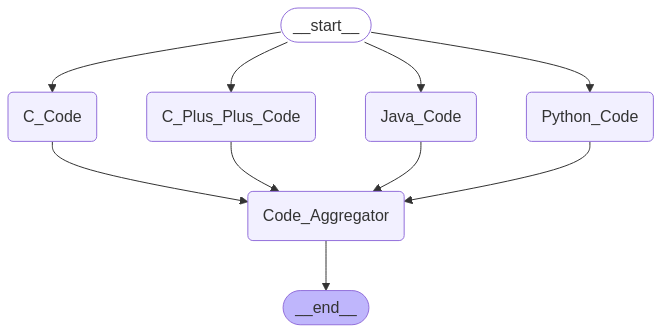

In [46]:
display(Image(parallel_workflow.get_graph().draw_mermaid_png()))

In [47]:
state = parallel_workflow.invoke({"code_topic": "code for fibonacci sequence"})

In [ ]:
Markdown(state["combined_code_output"])

Here's a combined code code written in python_code, c_code, c_plus_plus_code and java_code into a single output based on code for fibonacci sequence!

Python Code:
Certainly! Here is an optimized Python implementation for generating the Fibonacci sequence. This code takes advantage of Python's generator functions to handle potentially large sequences efficiently, avoiding the memory issues that could arise with large sequences if stored in a list. It also uses type hints and follows Python's best practices.

```python
from typing import Generator

def fibonacci(n: int) -> Generator[int, None, None]:
    """
    Generate Fibonacci sequence up to n-th term.
    
    Args:
    n (int): The number of terms in the Fibonacci sequence to generate.
    
    Yields:
    Generator[int, None, None]: The next number in the Fibonacci sequence.
    """
    a, b = 0, 1
    for _ in range(n):
        yield a
        a, b = b, a + b

def main():
    n = 10  # Example: Generate the first 10 terms of the Fibonacci sequence
    for value in fibonacci(n):
        print(value)

if __name__ == "__main__":
    main()
```

### Explanation:
- **Generator Function**: The `fibonacci` function is a generator, which means it can be used to generate the Fibonacci sequence on-the-fly, one element at a time. This is memory efficient as it doesn't store the entire sequence in memory all at once.
- **Type Hints**: The function has type hints for its parameters and return type, which helps with code understanding and can be used by type checkers to catch type-related errors early.
- **Efficient Computation**: The Fibonacci sequence is computed in a loop, utilizing tuple unpacking for swapping the values (`a, b = b, a + b`) which is a common Python idiom for this sort of operation.

This implementation is not only efficient in terms of memory but also easy to understand and maintain. It's also straightforward to modify if you need to generate a longer sequence or integrate the sequence generation into a larger application.

C Plus Plus Code:
Certainly! Below is a C++ implementation of the Fibonacci sequence with a focus on best practices and optimization. This version uses an iterative approach to avoid the exponential time complexity of the naive recursive solution and uses `long long` to handle larger values that can be computed within the bounds of 64-bit integers.

```cpp
#include <iostream>
#include <vector>

// Function to compute the n-th Fibonacci number using an iterative approach
long long fibonacci(int n) {
    if (n < 0) {
        // Handle invalid input
        throw std::invalid_argument("Fibonacci is not defined for negative numbers.");
    }
    // Fibonacci numbers for 0 and 1
    if (n == 0) return 0;
    if (n == 1) return 1;

    long long a = 0; // Fibonacci 0
    long long b = 1; // Fibonacci 1
    long long fib; // Current Fibonacci number

    // Compute Fibonacci number iteratively
    for (int i = 2; i <= n; ++i) {
        fib = a + b;
        // Shift the values
        a = b;
        b = fib;
    }

    return fib;
}

int main() {
    int n;
    std::cout << "Enter the position n for which you want to find the Fibonacci number: ";
    std::cin >> n;

    try {
        long long result = fibonacci(n);
        std::cout << "Fibonacci number at position " << n << " is " << result << std::endl;
    } catch (const std::invalid_argument& e) {
        std::cerr << "Error: " << e.what() << std::endl;
    }

    return 0;
}
```

### Explanation:
- **Input Validation:** The function checks if the input is negative and throws an exception if so. This is important because the Fibonacci sequence is not defined for negative indices.
- **Data Types:** `long long` is used to ensure that the function can handle larger Fibonacci numbers without overflow.
- **Efficiency:** The algorithm uses an iterative approach which is efficient with a time complexity of O(n) and space complexity of O(1). This is much better than the naive recursive approach which has a time complexity of O(2^n).
- **Exception Handling:** The program uses exception handling to manage invalid inputs, which makes the code more robust.
- **User Interaction:** The main function provides a simple interface for the user to enter the position `n` and outputs the corresponding Fibonacci number.

This version of the code should be efficient and robust for computing Fibonacci numbers within the range of `long long`.

C Code:
Certainly! Implementing the Fibonacci sequence in C with best practices and optimization involves several considerations. This includes using efficient algorithms, ensuring clarity and readability, and writing code that is robust and maintainable.

Here is an optimized C code for generating the Fibonacci sequence using an iterative approach, which is more efficient than the recursive approach in terms of time complexity and space usage:

```c
#include <stdio.h>

void printFibonacci(int n) {
    if (n <= 0) {
        printf("Please enter a positive integer.\n");
        return;
    }

    unsigned long long int a = 0, b = 1, c;
    printf("%llu ", a); // Print the first Fibonacci number
    if (n > 1) printf("%llu ", b); // Print the second Fibonacci number if n > 1

    // Generate and print the rest of the Fibonacci numbers
    for (int i = 2; i < n; i++) {
        c = a + b;
        a = b;
        b = c;
        printf("%llu ", c);
    }
    printf("\n");
}

int main() {
    int n;
    printf("Enter the number of terms: ");
    if (scanf("%d", &n) != 1) {
        printf("Invalid input. Please enter an integer.\n");
        return 1;
    }

    printFibonacci(n);
    return 0;
}
```

### Explanation of Best Practices and Optimizations:
1. **Use of `unsigned long long int` for Fibonacci Numbers**: Fibonacci numbers grow very quickly, so a larger data type (`unsigned long long int`) is used to handle larger values.

2. **Iterative Approach**: The iterative approach is used instead of recursion to avoid the exponential time complexity and potential stack overflow issues associated with recursion.

3. **Input Validation**: The program checks if the input is valid using `scanf`, ensuring that only integers are processed.

4. **Error Handling**: The program checks the return value of `scanf` to handle invalid input gracefully.

5. **Readability and Maintainability**: The code is structured to be readable, with clear function names and comments explaining the logic.

6. **Edge Cases**: The function handles edge cases, such as when `n` is less than or equal to 0, by prompting the user to enter a positive integer.

This code is both efficient and easy to understand, making it suitable for both production use and educational purposes.

Java Code:
Certainly! Below is an optimized and clean Java implementation of the Fibonacci sequence, following best practices in code style and performance. This version uses an iterative approach which is more efficient than the recursive approach for large values of `n`.

```java
public class Fibonacci {

    /**
     * Calculates the n-th Fibonacci number using an iterative approach.
     * 
     * @param n the position in the Fibonacci sequence.
     * @return the n-th Fibonacci number.
     * @throws IllegalArgumentException if the input is negative.
     */
    public static long fibonacci(int n) {
        if (n < 0) {
            throw new IllegalArgumentException("Input must be a non-negative integer.");
        }

        if (n <= 1) {
            return n;
        }

        long a = 0;
        long b = 1;

        for (int i = 2; i <= n; i++) {
            long next = a + b;
            a = b;
            b = next;
        }

        return b;
    }

    public static void main(String[] args) {
        int n = 10; // Example input
        try {
            long result = fibonacci(n);
            System.out.println("Fibonacci number at position " + n + " is " + result);
        } catch (IllegalArgumentException e) {
            System.err.println("Error: " + e.getMessage());
        }
    }
}
```

### Explanation of the Code
1. **Method Signature**: The `fibonacci` method accepts an `int` parameter `n` and returns the `n-th` Fibonacci number as a `long`. The return type is `long` to handle larger Fibonacci numbers since they can quickly exceed the maximum value of `int`.

2. **Input Validation**: The method first checks if the input `n` is negative and throws an `IllegalArgumentException` if so. This is a common practice to ensure the method works correctly under valid input conditions.

3. **Base Case Handling**: For `n` being 0 or 1, the method directly returns `n` since these are the first and second numbers of the Fibonacci sequence.

4. **Iterative Calculation**: For `n > 1`, the method uses a loop to calculate the Fibonacci number iteratively, which is efficient in terms of both time and space complexity.

5. **Main Method**: The `main` method provides a basic example of how to use the `fibonacci` method, including error handling for the case when the input might cause an exception.

This code is optimized and adheres to good coding practices, such as clear method documentation, input validation, and meaningful variable names.

: 

Markdown(state["combined_code_output"])